In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline
raw_data= np.random.randint(0,255,(3,100))

[[[ 0.36686091  0.21874463  0.98387768]
  [ 0.49879435  0.36878006  0.94719515]
  [ 0.62477183  0.86989788  0.69155507]
  [ 0.28821473  0.07641334  0.40100363]
  [ 0.95015874  0.56841138  0.2668361 ]]

 [[ 0.41859277  0.10657322  0.54269463]
  [ 0.88137141  0.26495391  0.44644009]
  [ 0.151571    0.68090348  0.23256681]
  [ 0.99511145  0.28396375  0.9467243 ]
  [ 0.61787135  0.46920413  0.04505124]]

 [[ 0.64157307  0.29433578  0.38609508]
  [ 0.76612452  0.63759431  0.33831656]
  [ 0.11936094  0.02971579  0.74200442]
  [ 0.2051877   0.17018021  0.15730689]
  [ 0.70720405  0.91363702  0.42212673]]

 [[ 0.67499535  0.65404673  0.70176429]
  [ 0.21087113  0.6624082   0.32151148]
  [ 0.42024376  0.93232251  0.05500672]
  [ 0.11408847  0.77442699  0.88577448]
  [ 0.45655097  0.61566107  0.8957639 ]]

 [[ 0.83024583  0.76415257  0.18729742]
  [ 0.91532749  0.30402282  0.16420635]
  [ 0.28881291  0.3973653   0.58256407]
  [ 0.04015441  0.88973587  0.6461076 ]
  [ 0.12524097  0.73931412  0.33

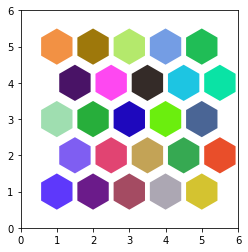

In [7]:
network_dimensions = np.array([5, 5])
n_iterations = 2000
init_learning_rate = 0.01
  
m = raw_data.shape[0]
n = raw_data.shape[1]
  
net = np.random.random((network_dimensions[0], network_dimensions[1], m))
print(net)  
init_radius = max(network_dimensions[0], network_dimensions[1]) / 2
  
time_constant = n_iterations / np.log(init_radius)

fig = plt.figure()

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, net.shape[0]+1))
ax.set_ylim((0, net.shape[1]+1))



for x in range(1, net.shape[0] + 1):
    for y in range(1, net.shape[1] + 1):
        if (y%2 ==0):
                ax.add_patch(patches.RegularPolygon((x+0.5, y), 6, 0.5,
                     facecolor=net[x-1,y-1,:],
                     edgecolor='none'))
        else:        
            ax.add_patch(patches.RegularPolygon((x, y), 6, 0.5,
                     facecolor=net[x-1,y-1,:],
                     edgecolor='none'))
plt.show()

In [8]:
data = raw_data
data = raw_data / data.max()
t = data[:, np.random.randint(0, n)].reshape(np.array([m, 1]))

In [9]:
def find_bmu(t, net, m):
   
    bmu_idx = np.array([0, 0])
    
    min_dist = np.iinfo(np.int).max
    
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            
            sq_dist = np.sum((w - t) ** 2)
            if sq_dist < min_dist:
                min_dist = sq_dist
                bmu_idx = np.array([x, y])
    
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
    
    return (bmu, bmu_idx)

In [13]:
def decay_radius(initial_radius, i, time_constant):
    return initial_radius * np.exp(-i / time_constant)
def decay_learning_rate(initial_learning_rate, i, n_iterations):
    return initial_learning_rate * np.exp(-i / n_iterations)
def calculate_influence(distance, radius):
    return np.exp(-distance / (2* (radius**2)))

In [14]:
for i in range(n_iterations):
    t = data[:, np.random.randint(0, n)].reshape(np.array([m, 1]))
    
    bmu, bmu_idx = find_bmu(t, net, m)
    
    r = decay_radius(init_radius, i, time_constant)
    l = decay_learning_rate(init_learning_rate, i, n_iterations)
    
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            w_dist = np.sum((np.array([x, y]) - bmu_idx) ** 2)
            if w_dist <= r**2:
                influence = calculate_influence(w_dist, r)
                new_w = w + (l * influence * (t - w))
                net[x, y, :] = new_w.reshape(1, 3)

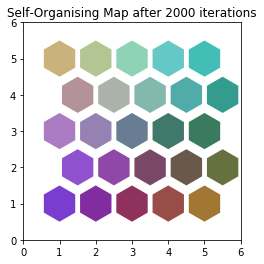

In [15]:
fig = plt.figure()

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, net.shape[0]+1))
ax.set_ylim((0, net.shape[1]+1))
ax.set_title('Self-Organising Map after %d iterations' % n_iterations)


for x in range(1, net.shape[0] + 1):
    for y in range(1, net.shape[1] + 1):
        if (y%2 ==0):
                ax.add_patch(patches.RegularPolygon((x+0.5, y), 6, 0.5,
                     facecolor=net[x-1,y-1,:],
                     edgecolor='none'))
        else:        
            ax.add_patch(patches.RegularPolygon((x, y), 6, 0.5,
                     facecolor=net[x-1,y-1,:],
                     edgecolor='none'))
plt.show()